# Jimmy Wrangler, Data Explorer

### __1. INDUSTRY__ 

__Movies and entertainment__ industry is chosen as the digital video platforms because it has one of the fastest growing market.

### __2. DATA SETS__

__2.1. SOURCE__: The dataset is from [Kaggle](https://www.kaggle.com/datasets) in [this link](https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney).

__DESCRIPTION__: The dataset contains about sixteen thousand data with attributes related to movies released in streaming platforms including netflix, hulu, prime and disney+. The following attributes from the dataset will be used for analysis.

|Attribute       | Datatype     |
| :------------- | ----------: |
| Title | Object   |
| Age   | Int64 |
|Year| Int64|
|IMDb| Float64|
|Rotten Tomatoes | Object|
|Netflix|Int64|
|Hulu|Int64|
|Prime Video|Int64|
|Disney+|Int64|
|Type|Int64||

__2.2. SOURCE__: The dataset is from [Kaggle](https://www.kaggle.com/datasets) in [this link](https://www.kaggle.com/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney).

__DESCRIPTION:__ The dataset contains about sixteen thousand data with attributes related to movies released in streaming platforms including netflix, hulu, prime and disney+. All the attributes from the dataset will be used for analysis.

|Attribute       | Datatype     |
| :------------- | ----------: |
| Title | Object   |
| Age   | Int64 |
|Year| Int64|
|IMDb| Float64|
|Rotten Tomatoes | Object|
|Netflix|Int64|
|Hulu|Int64|
|Prime Video|Int64|
|Disney+|Int64|
|Type|Int64||

### __3. IDEAS TO COMBINE THE DATASETS__

__3.1.__ To understand the count and rating of videos available in different platforms, the common columns in both the datasets can be combined using concat.

__3.2.__ To understand the release of videos in different platforms for the release years and their ratings, the common columns in both the datasets will be combined using concat.

### __4. LOADING THE DATASETS__

In [1]:
#Load the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import the csv file of first dataset
movies_data=pd.read_csv("/Users/madhumithrasubramaniankarthikesh/Downloads/MoviesOnStreamingPlatforms_updated.csv")
movies_data.drop(["Directors","ID", "Genres","Country","Language","Runtime"], inplace=True, axis=1)
#Inserting new column category to keep track of movies
movies_data.insert(11, 'Category','Movie')
movies_data['Category'] = 'Movie' 
movies_data.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Category
0,0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Movie
1,1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,Movie
2,2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,Movie
3,3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Movie
4,4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Movie


In [3]:
#Import the csv file of second dataset
tvshow_data=pd.read_csv("/Users/madhumithrasubramaniankarthikesh/Downloads/tv_shows.csv")
tvshow_data.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


### __5. DATA PREPARATION__

__5.1 DATA CLEANING__

In [4]:
#Rename the column type as Type
tvshow_data.rename(columns={"type": "Type"},inplace=True)
#Inserting new column category to keep track of movies
tvshow_data.insert(11, 'Category','TV')
tvshow_data['Category'] = 'TV' 
tvshow_data.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Category
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1,TV
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1,TV
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1,TV
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1,TV
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1,TV


In [5]:
#Checking the dimensions of the datasets
print(movies_data.shape)
print(tvshow_data.shape)

(16744, 12)
(5611, 12)


__5.2 TRANSFORMATION INTO A SINGLE DATASET__

In [6]:
#Combined dataset
prep_data = pd.concat([movies_data, tvshow_data])
prep_data.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Category
0,0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Movie
1,1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,Movie
2,2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,Movie
3,3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Movie
4,4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Movie


In [7]:
#Dimension of the combined dataset
print(prep_data.shape)

(22355, 12)


__5.3 FORMATTING__

In [8]:
#Attributes and datatypes
for column in prep_data.columns:
    print(column, " is ", prep_data[column].dtype.name)
#Removing percentage sign in tomatoes
prep_data['Rotten Tomatoes'] = prep_data['Rotten Tomatoes'].str.rstrip('%').astype('float') / 100.0
prep_data.head()

Unnamed: 0  is  int64
Title  is  object
Year  is  int64
Age  is  object
IMDb  is  float64
Rotten Tomatoes  is  object
Netflix  is  int64
Hulu  is  int64
Prime Video  is  int64
Disney+  is  int64
Type  is  int64
Category  is  object


,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Category
0,0,Inception,2010,13+,8.8,0.87,1,0,0,0,0,Movie
1,1,The Matrix,1999,18+,8.7,0.87,1,0,0,0,0,Movie
2,2,Avengers: Infinity War,2018,13+,8.5,0.84,1,0,0,0,0,Movie
3,3,Back to the Future,1985,7+,8.5,0.96,1,0,0,0,0,Movie
4,4,"The Good, the Bad and the Ugly",1966,18+,8.8,0.97,1,0,1,0,0,Movie


__5.4 VISUALIZATION__

count    20623.000000
mean         6.163953
std          1.396126
min          0.000000
25%          5.300000
50%          6.300000
75%          7.200000
max          9.600000
Name: IMDb, dtype: float64

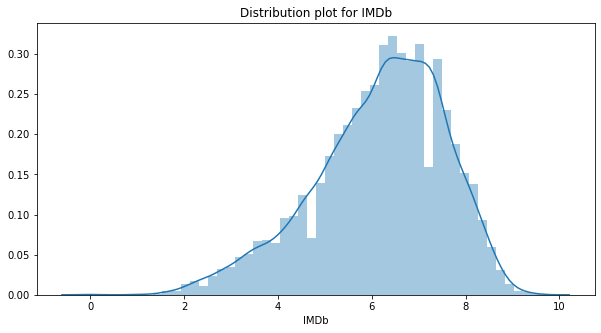

In [9]:
#IMDb ratings and their distribution plot
plt.figure(figsize=(10, 5))
sns.distplot(prep_data['IMDb'].dropna()).set_title('Distribution plot for IMDb');
prep_data['IMDb'].describe()

The average IMDb rating for videos is 6.16. This was done to get an idea of IMDb rating distribution.

count    6169.000000
mean        0.674075
std         0.261066
min         0.020000
25%         0.490000
50%         0.750000
75%         0.890000
max         1.000000
Name: Rotten Tomatoes, dtype: float64

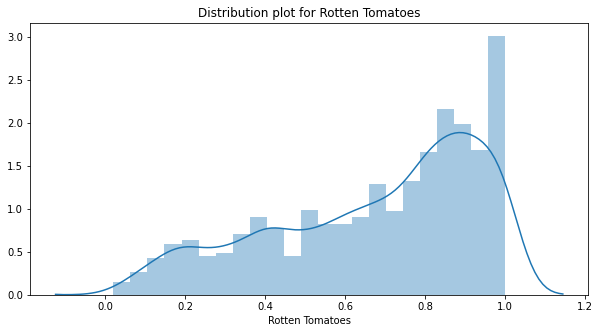

In [10]:
#Rotten tomato ratings and distribution plot
plt.figure(figsize=(10, 5))
sns.distplot(prep_data['Rotten Tomatoes'].dropna()).set_title('Distribution plot for Rotten Tomatoes');
prep_data['Rotten Tomatoes'].describe()

The average rotten tomatoes rating for videos is 67.40%. This was done to get an idea of rotten tomatoes rating distribution.

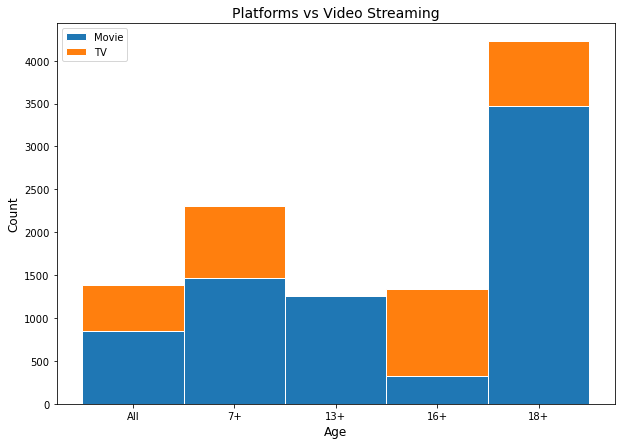

In [11]:
#Barplot of videos in each categories
all_bar = prep_data.groupby(['Age']).get_group('all')
all_movie=all_bar.Category.value_counts()['Movie']
all_tv=all_bar.Category.value_counts()['TV']
seven_bar = prep_data.groupby(['Age']).get_group('7+')
seven_movie=seven_bar.Category.value_counts()['Movie']
seven_tv=seven_bar.Category.value_counts()['TV']
thirteen_bar = prep_data.groupby(['Age']).get_group('13+')
thirteen_movie=thirteen_bar.Category.value_counts()['Movie']
thirteen_tv=thirteen_bar.Category.value_counts()['TV']
six_bar = prep_data.groupby(['Age']).get_group('16+')
six_movie=six_bar.Category.value_counts()['Movie']
six_tv=six_bar.Category.value_counts()['TV']
eight_bar = prep_data.groupby(['Age']).get_group('18+')
eight_movie=eight_bar.Category.value_counts()['Movie']
eight_tv=eight_bar.Category.value_counts()['TV']
movie=[all_movie,seven_movie,thirteen_movie,six_movie,eight_movie]
tv=[all_tv,seven_tv,thirteen_tv,six_tv,eight_tv]
# The position of the bars on the x-axis
barWidth = 1
x_axis=['All','7+','13+','16+','18+']
r = range(len(x_axis))
#plot bars
plt.figure(figsize=(10,7))
plt.bar(r,movie, edgecolor='white', width=barWidth, label="Movie")
plt.bar(r,tv, bottom=np.array(movie), edgecolor='white', width=barWidth, label='TV')
plt.legend()
# Custom X axis
plt.xticks(r,x_axis)
plt.ylabel("Count",fontsize=12)
plt.xlabel("Age",fontsize=12)
plt.title("Platforms vs Video Streaming",fontsize=14)
plt.show()

The relationship between the age category and the number of movies and tv shows was analyzed. 
1. Except in 16+ category, all other categories have more movies than tv shows.
2. Highest number of movies fall in the category of 18+.
3. Highest number of tv shows fall in the category of 16+.

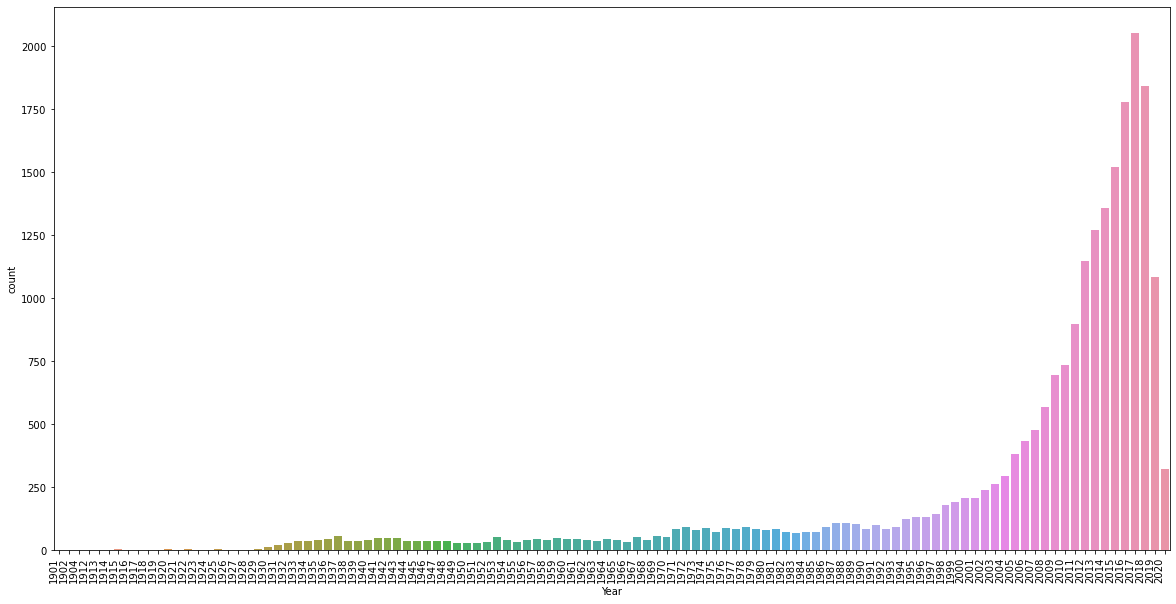

In [12]:
#Barplot of videos for each year
plt.figure(figsize=(20,10))
g = sns.countplot(x=prep_data['Year'], data=prep_data)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right");

The relationship between the year and the number of videos was analyzed. Highest number of videos were released in 2017.

In [13]:
#Number of videos available in each platforms
print("Total videos available in each platform")
print("Netflix: "+str(prep_data['Netflix'].value_counts()[1]))
print("Hulu: "+str(prep_data['Hulu'].value_counts()[1]))
print("Prime video: "+str(prep_data['Prime Video'].value_counts()[1]))
print("Disney+: "+str(prep_data['Disney+'].value_counts()[1]))

Total videos available in each platform
Netflix: 5491
Hulu: 2657
Prime video: 14498
Disney+: 744


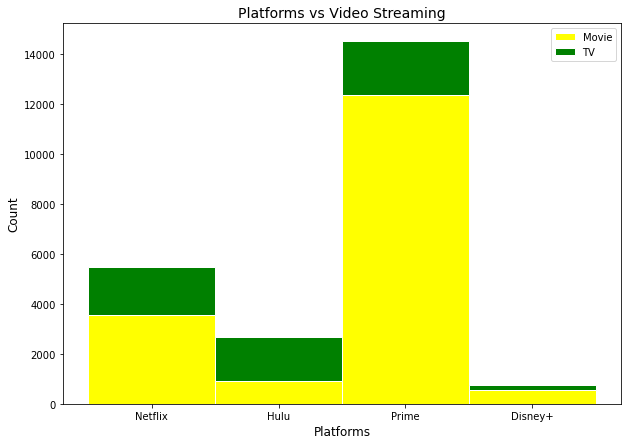

In [14]:
netflix_bar = prep_data.groupby(['Netflix']).get_group(1)
netflix_movie=netflix_bar.Category.value_counts()['Movie']
netflix_tv=netflix_bar.Category.value_counts()['TV']
hulu_bar = prep_data.groupby(['Hulu']).get_group(1)
hulu_movie=hulu_bar.Category.value_counts()['Movie']
hulu_tv=hulu_bar.Category.value_counts()['TV']
prime_bar = prep_data.groupby(['Prime Video']).get_group(1)
prime_movie=prime_bar.Category.value_counts()['Movie']
prime_tv=prime_bar.Category.value_counts()['TV']
disney_bar = prep_data.groupby(['Disney+']).get_group(1)
disney_movie=disney_bar.Category.value_counts()['Movie']
disney_tv=disney_bar.Category.value_counts()['TV']
movie=[netflix_movie,hulu_movie,prime_movie,disney_movie]
tv=[netflix_tv,hulu_tv,prime_tv,disney_tv]
# The position of the bars on the x-axis
barWidth = 1
x_axis=['Netflix','Hulu','Prime','Disney+']
r = range(len(x_axis))
#plot bars
plt.figure(figsize=(10,7))
plt.bar(r,movie, color='yellow', edgecolor='white', width=barWidth, label="Movie")
plt.bar(r,tv, bottom=np.array(movie), color='green', edgecolor='white', width=barWidth, label='TV')
plt.legend()
# Custom X axis
plt.xticks(r,x_axis)
plt.ylabel("Count",fontsize=12)
plt.xlabel("Platforms",fontsize=12)
plt.title("Platforms vs Video Streaming",fontsize=14)
plt.show()

The relationship between the platforms and the number of movies and tv shows was analyzed. 
1. Except Hulu, all other platforms have more movies than tv shows.
2. Highest number of movies is in Prime.
3. Highest number of tv is in Disney+.

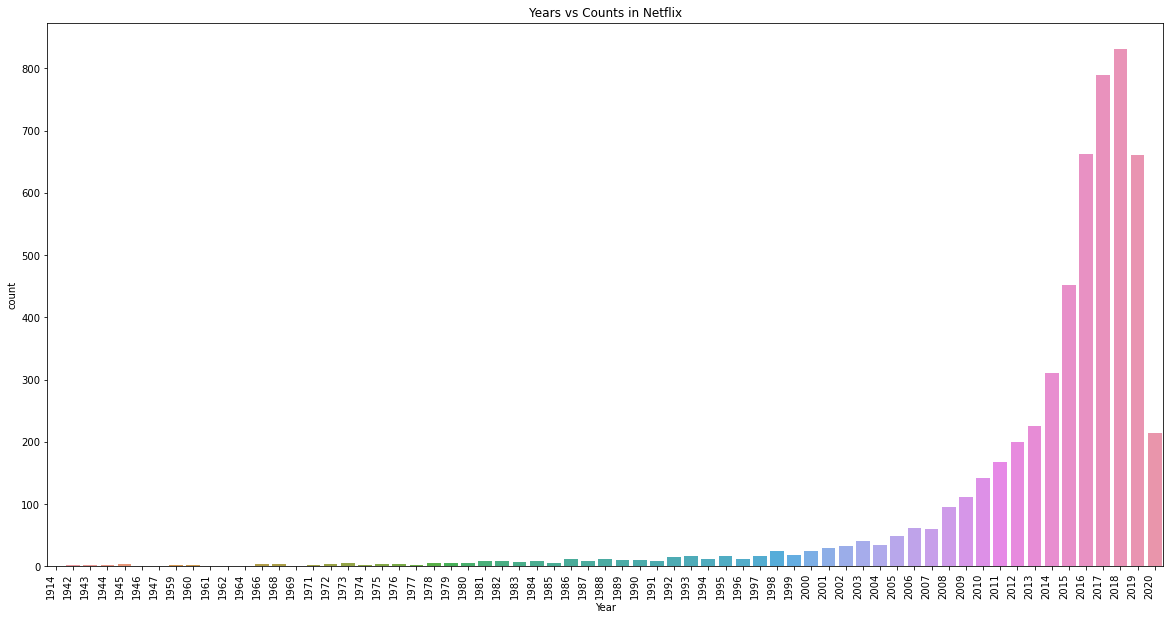

In [15]:
#Barplot of videos in Netflix over the years
netflix_year = prep_data.groupby(['Netflix']).get_group(1)
plt.figure(figsize=(20,10))
g = sns.countplot(x=netflix_year['Year'], data=netflix_year)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right");
g.set_title('Years vs Counts in Netflix');

The relationship between the release year and the number of videos in Netflix was analyzed. The collection of movies released in 2018 is the highest.

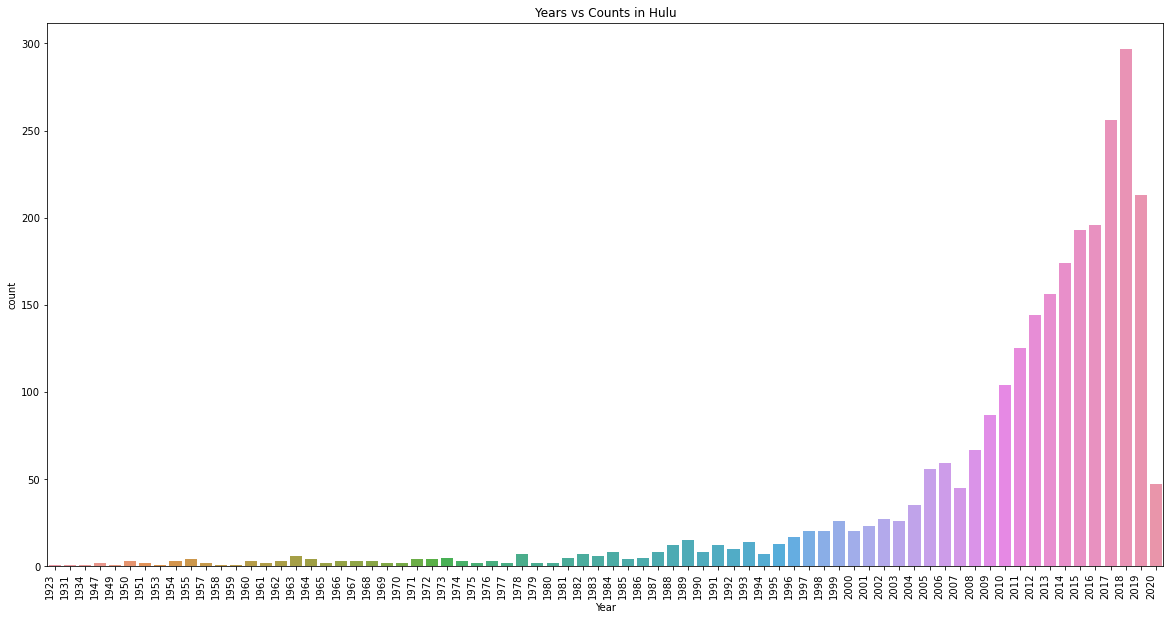

In [16]:
#Barplot of videos in Hulu over the years
hulu_year = prep_data.groupby(['Hulu']).get_group(1)
plt.figure(figsize=(20,10))
g = sns.countplot(x=hulu_year['Year'], data=hulu_year)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right");
g.set_title('Years vs Counts in Hulu');

The relationship between the release year and the number of videos in Hulu was analyzed. The collection of movies released in 2018 is the highest.

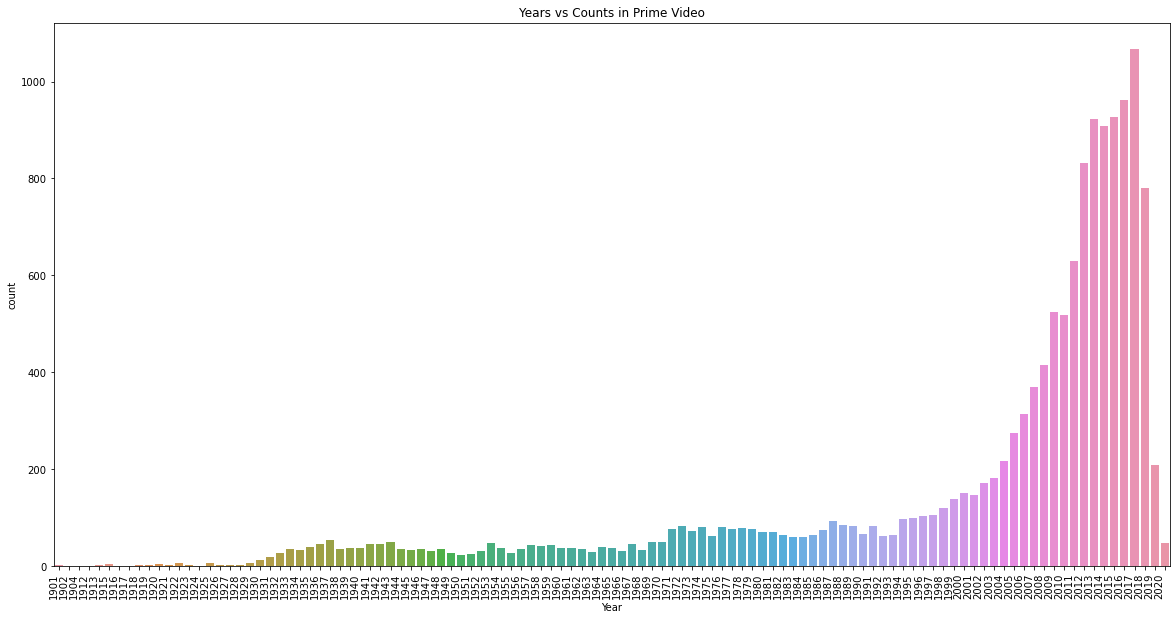

In [17]:
#Barplot of videos in Prime over the years
prime_year = prep_data.groupby(['Prime Video']).get_group(1)
plt.figure(figsize=(20,10))
g = sns.countplot(x=prime_year['Year'], data=prime_year)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right");
g.set_title('Years vs Counts in Prime Video');

The relationship between the release year and the number of videos in Prime was analyzed. The collection of movies released in 2017 is the highest.

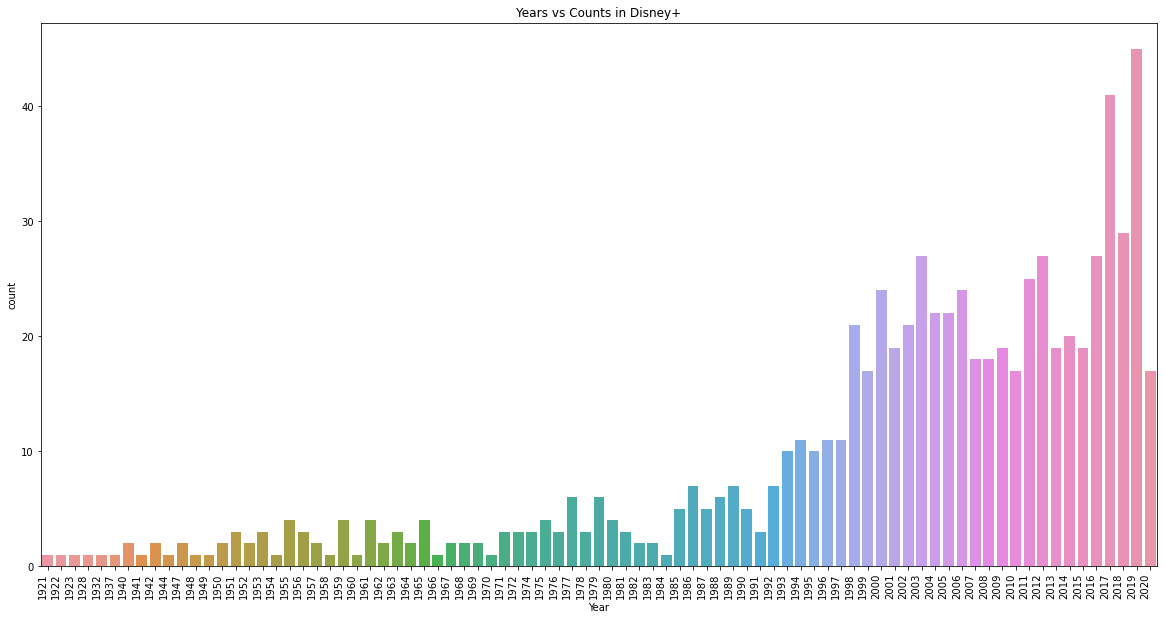

In [18]:
#Barplot of videos in Disney+ over the years
disney_year = prep_data.groupby(['Disney+']).get_group(1)
plt.figure(figsize=(20,10))
g = sns.countplot(x=disney_year['Year'], data=disney_year)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right");
g.set_title('Years vs Counts in Disney+');

The relationship between the release year and the number of videos in Disney+ was analyzed. The collection of movies released in 2018 is the highest.

In [19]:
#Videos in all platforms over the years
prime_count=prime_year['Year'].value_counts().to_frame()
prime_count.rename(columns={"Year": "Prime Count"},inplace=True)
prime_count['Year'] = prime_count.index
prime_count = prime_count.sort_values('Year')
prime_count = (prime_count.set_index('Year')
        .reindex(range(1901, 2021), fill_value=0)
        .reset_index())
prime_count = prime_count[prime_count['Year']>1923]  
prime_count = prime_count.reset_index()
prime_count.drop(["index"], inplace=True, axis=1)
netflix_count=netflix_year['Year'].value_counts().to_frame()
netflix_count.rename(columns={"Year": "Netflix Count"},inplace=True)
netflix_count['Year'] = netflix_count.index
netflix_count = netflix_count.sort_values('Year')
netflix_count = (netflix_count.set_index('Year')
        .reindex(range(1901, 2021), fill_value=0)
        .reset_index())
netflix_count = netflix_count[netflix_count['Year']>1923]  
netflix_count = netflix_count.reset_index()
netflix_count.drop(["index"], inplace=True, axis=1)
disney_count=disney_year['Year'].value_counts().to_frame()
disney_count.rename(columns={"Year": "Disney Count"},inplace=True)
disney_count['Year'] = disney_count.index
disney_count = disney_count.sort_values('Year')
disney_count= (disney_count.set_index('Year')
        .reindex(range(1901, 2021), fill_value=0)
        .reset_index())
disney_count = disney_count[disney_count['Year']>1923]  
disney_count = disney_count.reset_index()
disney_count.drop(["index"], inplace=True, axis=1)
hulu_count=hulu_year['Year'].value_counts().to_frame()
hulu_count.rename(columns={"Year": "Hulu Count"},inplace=True)
hulu_count['Year'] = hulu_count.index
hulu_count = hulu_count.sort_values('Year')
hulu_count= (hulu_count.set_index('Year')
        .reindex(range(1901, 2021), fill_value=0)
        .reset_index())
hulu_count = hulu_count[hulu_count['Year']>1923]  
hulu_count = hulu_count.reset_index()
hulu_count.drop(["index"], inplace=True, axis=1)
#Creating new data frame with data for stacked barplot
movie_count=netflix_count
movie_count.insert(2, 'Hulu Count', hulu_count['Hulu Count'])
movie_count.insert(3, 'Disney Count', disney_count['Disney Count'])
movie_count.insert(4, 'Prime Count', prime_count['Prime Count'])
movie_count

,Year,Netflix Count,Hulu Count,Disney Count,Prime Count
0,1924,0,0,0,1
1,1925,0,0,0,6
2,1926,0,0,0,3
3,1927,0,0,0,2
4,1928,0,0,1,2
...,...,...,...,...,...
92,2016,663,196,27,961
93,2017,790,256,41,1068
94,2018,832,297,29,780
95,2019,661,213,45,208


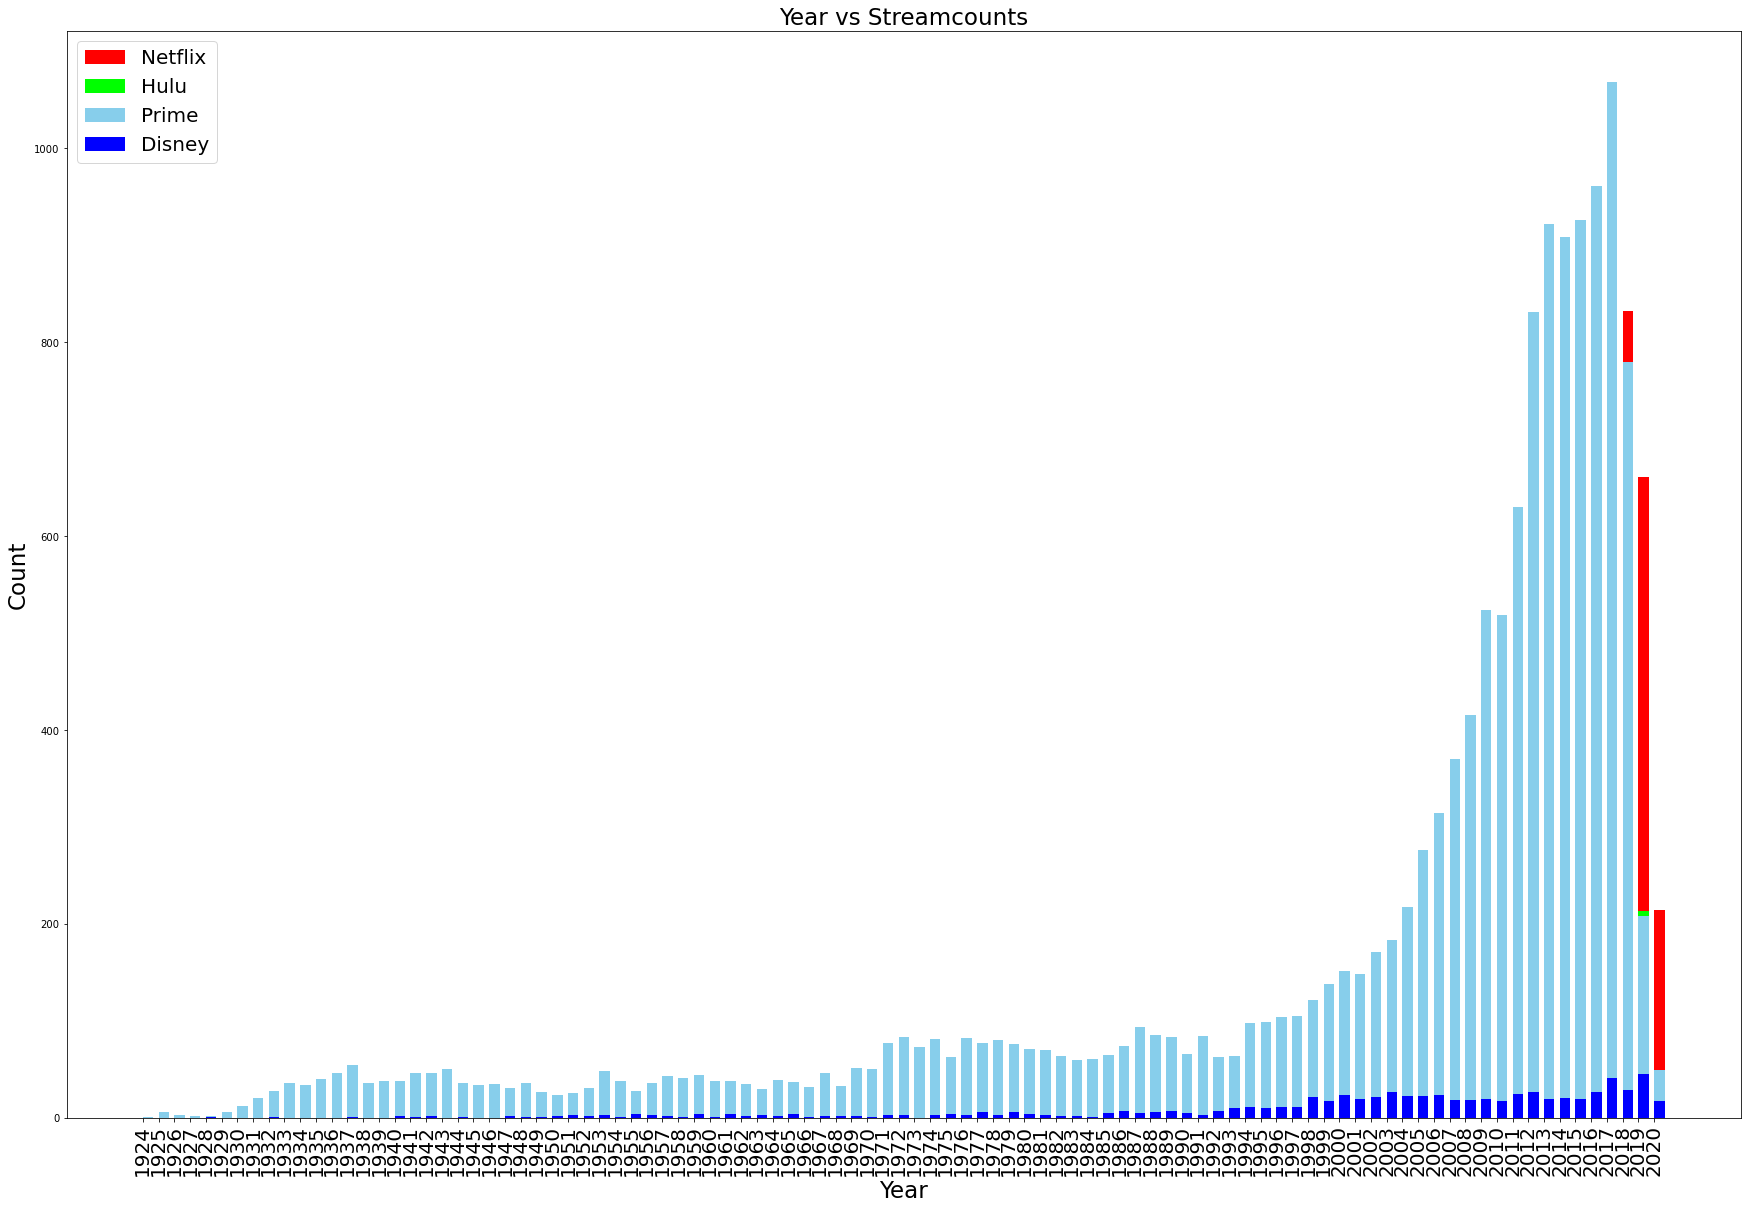

In [20]:
#Stacked barplot of movies over years
N = 97
ind = np.arange(N)    
width = 0.66     
plt.figure(figsize=(30,20))
p1 = plt.bar(ind, movie_count['Netflix Count'], width, color='red', align='edge')
p2 = plt.bar(ind, movie_count['Hulu Count'], width, color='lime', align='edge')
p3 = plt.bar(ind, movie_count['Prime Count'], width, color='skyblue', align='edge')
p4 = plt.bar(ind, movie_count['Disney Count'], width, color='blue', align='edge')
plt.xlabel('Year', fontsize=23)
plt.ylabel('Count', fontsize=23)
plt.title('Year vs Streamcounts', fontsize=23)
plt.xticks(ind, movie_count['Year'],rotation=90, fontsize=20)
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Netflix', 'Hulu', 'Prime', 'Disney'), prop={'size': 20})
plt.show()

The relationship between the year and the number of videos was analyzed in different platforms. 
1. Prime has highest collections of movies and tv shows released in all years except in 2020 and 2019.
2. The collection of 2019 and 2020 released movies and tv shows is highest in Netflix.

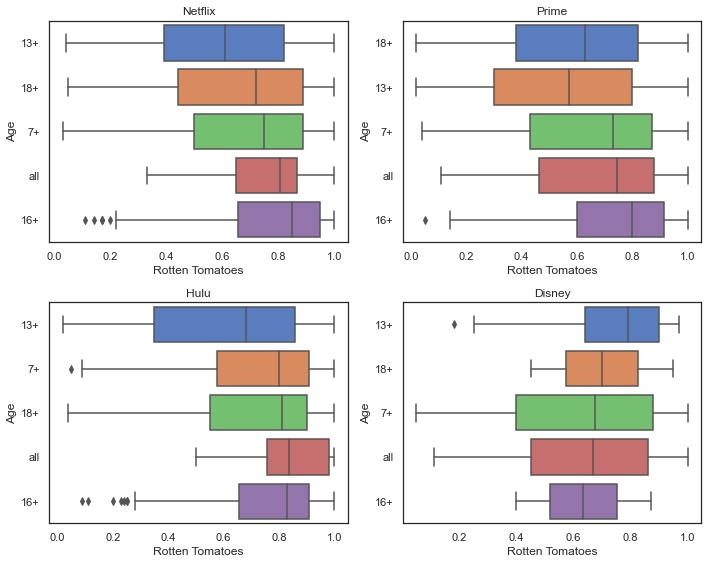

In [21]:
#Understanding Rotten Tomatoes Rating for all platforms
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(10, 8))
#Boxplot of Rotten Tomatoes Rating vs Age for Netflix
sns.boxplot(y='Age', x='Rotten Tomatoes', data=netflix_year, ax=axes[0, 0]).set_title('Netflix')
#Boxplot of Rotten Tomatoes Rating vs Age for Prime
sns.boxplot(y='Age', x='Rotten Tomatoes', data=prime_year, ax=axes[0, 1]).set_title('Prime')
#Boxplot of Rotten Tomatoes Rating vs Age for Hulu
sns.boxplot(y='Age', x='Rotten Tomatoes', data=hulu_year, ax=axes[1, 0]).set_title('Hulu')
#Boxplot of Rotten Tomatoes Rating vs Age for Disney
sns.boxplot(y='Age', x='Rotten Tomatoes', data=disney_year, ax=axes[1, 1]).set_title('Disney')
plt.tight_layout()

In the box plots, the relationship between the rotten tomato rating for all various platforms has been studied for different age category.
1. All age category has highest average rotten tomatoes in Prime.
2. 7+ and 18+ age categories have highest average rotten tomatoes in Hulu.
3. 13+ age category has highest average rotten tomatoes in Disney+.
4. 16+ age category has highest average rotten tomatoes in Netflix.

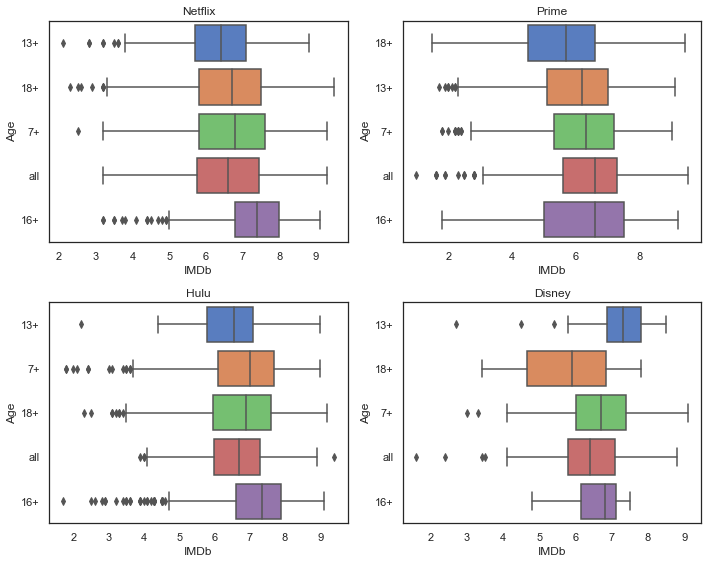

In [22]:
#Understanding IMDb Rating for all platforms
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(10, 8))
#Boxplot of IMDb vs Age for Netflix
sns.boxplot(y='Age', x='IMDb', data=netflix_year, ax=axes[0, 0]).set_title('Netflix')
#Boxplot of IMDb vs Age for Prime
sns.boxplot(y='Age', x='IMDb', data=prime_year, ax=axes[0, 1]).set_title('Prime')
#Boxplot of IMDb vs Age for Prime
sns.boxplot(y='Age', x='IMDb', data=hulu_year, ax=axes[1, 0]).set_title('Hulu')
#Boxplot of IMDb vs Age for Disney
sns.boxplot(y='Age', x='IMDb', data=disney_year, ax=axes[1, 1]).set_title('Disney')
plt.tight_layout()

In the box plots, the relationship between the rotten tomato rating for all various platforms has been studied for different age category.
1. All, 16+ and 18+ age category has highest average rotten tomatoes in Hulu.
2. 7+ age categories have highest average rotten tomatoes in Netflix.
3. 13+ age category has highest average rotten tomatoes in Disney+.

<Figure size 2160x3600 with 0 Axes>

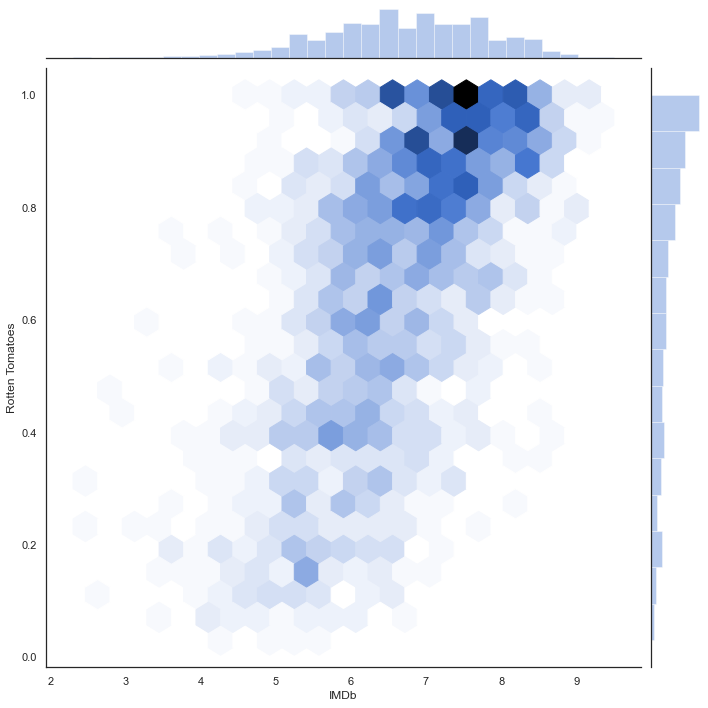

In [23]:
#Jointplot of IMDB vs Rotten Tomatoes for Netflix
plt.figure(figsize=(30,50))
graph=sns.jointplot(x='IMDb', y='Rotten Tomatoes', data=netflix_year, kind="hex",height=10, ratio=10);
graph.x = netflix_year['IMDb']
graph.y = netflix_year['Rotten Tomatoes']

High correlation between the imdb and rotten tomatoes for netflix is found in the imdb rating range of 7 to 8 and rotten tomatoes range of 0.9 and 1.0.

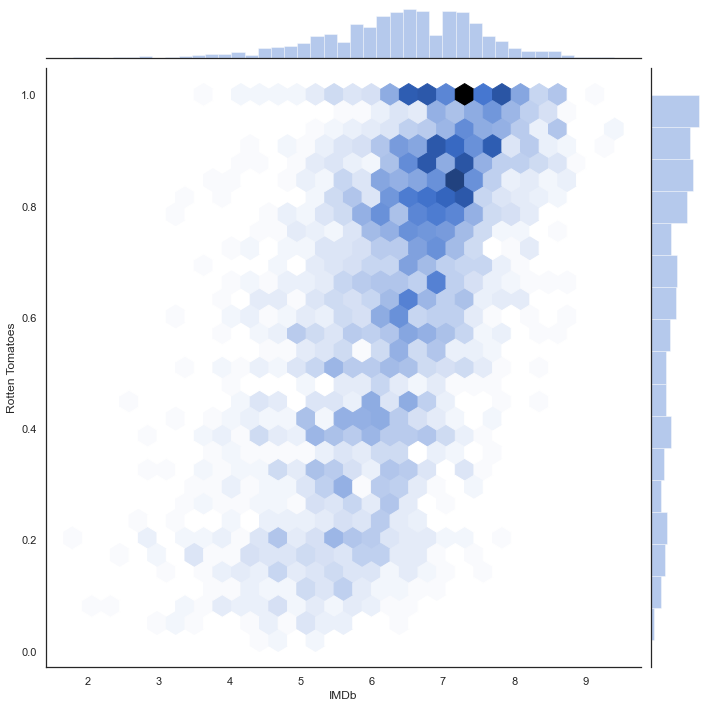

In [24]:
#Jointplot of IMDB vs Rotten Tomatoes for Prime
sns.jointplot(x='IMDb', y='Rotten Tomatoes', data=prime_year, kind="hex",height=10, ratio=10);

High correlation between the imdb and rotten tomatoes for Prime is found in the imdb rating around 7 and rotten tomatoes between 0.8 and 1.0.

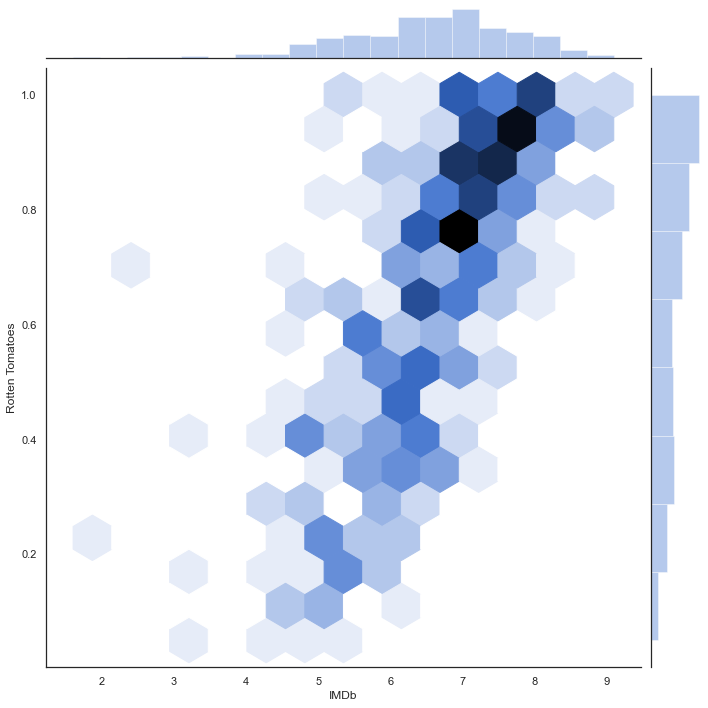

In [25]:
#Jointplot of IMDB vs Rotten Tomatoes for Disney
sns.jointplot(x='IMDb', y='Rotten Tomatoes', data=disney_year, kind="hex",height=10, ratio=10);

High correlation between the imdb and rotten tomatoes for Disney+ is found in the imdb rating range of 6 to 8 and rotten tomatoes between 0.8 and 1.0.

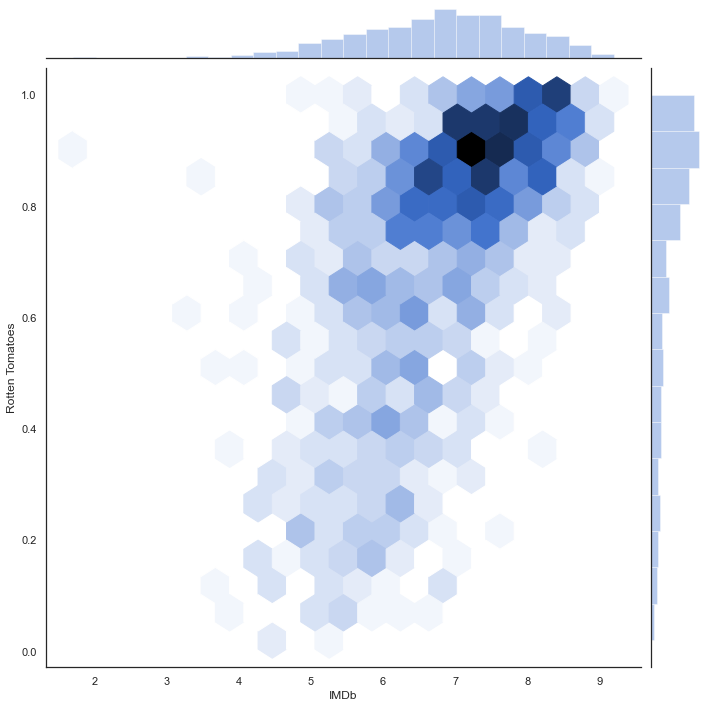

In [26]:
#Jointplot of IMDB vs Rotten Tomatoes for Hulu
sns.jointplot(x='IMDb', y='Rotten Tomatoes', data=hulu_year, kind="hex",height=10, ratio=10);

High correlation between the imdb and rotten tomatoes for Hulu is found in the imdb rating range of 6 to 9 and rotten tomatoes between 0.8 and 1.0.

In [27]:
#Toprated IMDb video in Netflix
netflix_imdb=(netflix_year.loc[netflix_year['IMDb']== netflix_year['IMDb'].max() , ['Title','Rotten Tomatoes','IMDb']])
#Toprated IMDb video in Hulu
hulu_imdb=hulu_year.loc[hulu_year['IMDb']== hulu_year['IMDb'].max() , ['Title','Rotten Tomatoes','IMDb']]
#Toprated IMDb video in Disney
disney_imdb=disney_year.loc[disney_year['IMDb']== disney_year['IMDb'].max() , ['Title','Rotten Tomatoes','IMDb']]
#Toprated IMDb video in Prime
prime_imdb=prime_year.loc[prime_year['IMDb']== prime_year['IMDb'].max() , ['Title','Rotten Tomatoes','IMDb']]
imdb_data=pd.DataFrame({'Platform':['Netflix','Hulu','Prime','Disney+'],'Title':[netflix_imdb['Title'][0],hulu_imdb['Title'][3023],prime_imdb['Title'][3747],disney_imdb['Title'][5465]],'IMDb':[netflix_imdb['IMDb'][0],hulu_imdb['IMDb'][3023],prime_imdb['IMDb'][3747],disney_imdb['IMDb'][5465]],'Rotten Tomatoes':[netflix_imdb['Rotten Tomatoes'][0],hulu_imdb['Rotten Tomatoes'][3023],prime_imdb['Rotten Tomatoes'][3747],disney_imdb['Rotten Tomatoes'][5465]]})
imdb_data

,Platform,Title,IMDb,Rotten Tomatoes
0,Netflix,Breaking Bad,9.5,0.96
1,Hulu,Destiny,9.6,NaN
2,Prime,Malgudi Days,9.5,NaN
3,Disney+,The Imagineering Story,9.1,1.00


In [28]:
#Toprated rotten tomatoes video in Netflix
netflix_year.loc[netflix_year['Rotten Tomatoes']== netflix_year['Rotten Tomatoes'].max() , ['Title','IMDb','Rotten Tomatoes']]

,Title,IMDb,Rotten Tomatoes
11,3 Idiots,8.4,1.0
89,The Dawn Wall,8.1,1.0
126,Bad Genius,7.6,1.0
141,Bill Burr: I'm Sorry You Feel That Way,8.4,1.0
148,The Square,8.1,1.0
...,...,...,...
621,The Standups,6.7,1.0
690,Kantaro: The Sweet Tooth Salaryman,7.6,1.0
742,Final Fantasy XIV: Dad of Light,7.2,1.0
817,The Honeymoon Stand Up Special,6.8,1.0


In [29]:
#Toprated rotten tomatoes video in Hulu
hulu_year.loc[hulu_year['Rotten Tomatoes']== hulu_year['Rotten Tomatoes'].max() , ['Title','IMDb','Rotten Tomatoes']]

,Title,IMDb,Rotten Tomatoes
148,The Square,8.1,1.0
285,Hey Arnold! The Jungle Movie,7.6,1.0
3613,Honeyland,8.0,1.0
3625,Minding the Gap,8.1,1.0
3693,Sands of Iwo Jima,7.1,1.0
3695,Sword Art Online: The Movie - Ordinal Scale,7.4,1.0
3741,The Domestics,5.7,1.0
3742,Andy Irons: Kissed by God,8.3,1.0
3760,Burn,7.5,1.0
3769,After the Screaming Stops,7.1,1.0


In [30]:
#Toprated rotten tomatoes video in Disney
disney_year.loc[disney_year['Rotten Tomatoes']== disney_year['Rotten Tomatoes'].max() , ['Title','IMDb','Rotten Tomatoes']]

,Title,IMDb,Rotten Tomatoes
5164,Robin Hood,7.2,1.0
5398,The Three Musketeers,7.0,1.0
16215,Toy Story,8.3,1.0
16233,Toy Story 2,7.9,1.0
16251,Mary Poppins,7.8,1.0
16273,Pinocchio,7.4,1.0
16286,The Many Adventures of Winnie the Pooh,7.6,1.0
16289,Mickey's Christmas Carol,8.0,1.0
16318,Tinker Bell,6.8,1.0
16327,Old Yeller,7.3,1.0


In [31]:
#Toprated rotten tomatoes video in Prime
prime_year.loc[prime_year['Rotten Tomatoes']== prime_year['Rotten Tomatoes'].max() , ['Title','IMDb','Rotten Tomatoes']]

,Title,IMDb,Rotten Tomatoes
11,3 Idiots,8.4,1.0
148,The Square,8.1,1.0
288,Hamburger Hill,6.7,1.0
395,Whisky,7.1,1.0
418,Retribution,6.6,1.0
...,...,...,...
3655,Mr. Show with Bob and David,8.3,1.0
3661,"Eerie, Indiana",8.2,1.0
3680,Home Fires,8.2,1.0
3763,Garfunkel and Oates,7.5,1.0


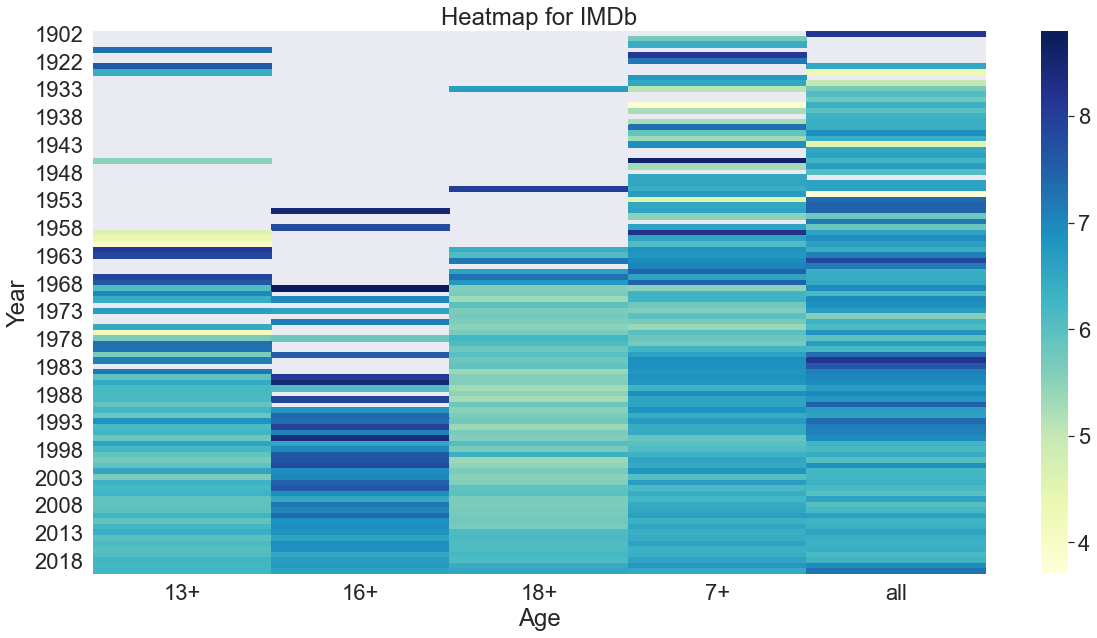

In [32]:
#Heatmap of age, year and IMDb
plt.figure(figsize=(20,10))
sns.set(font_scale=2) 
IMDb_data = pd.pivot_table(prep_data, values='IMDb', 
                     index=['Year'], 
                     columns='Age')
sns.heatmap(IMDb_data, cmap="YlGnBu").set_title('Heatmap for IMDb');

For all videos across all platforms, for all vidoes released in 16+ age category the IMDb rating is usually higher. Also, lot of lower IMDb rating fall under 18+ age category for many years.

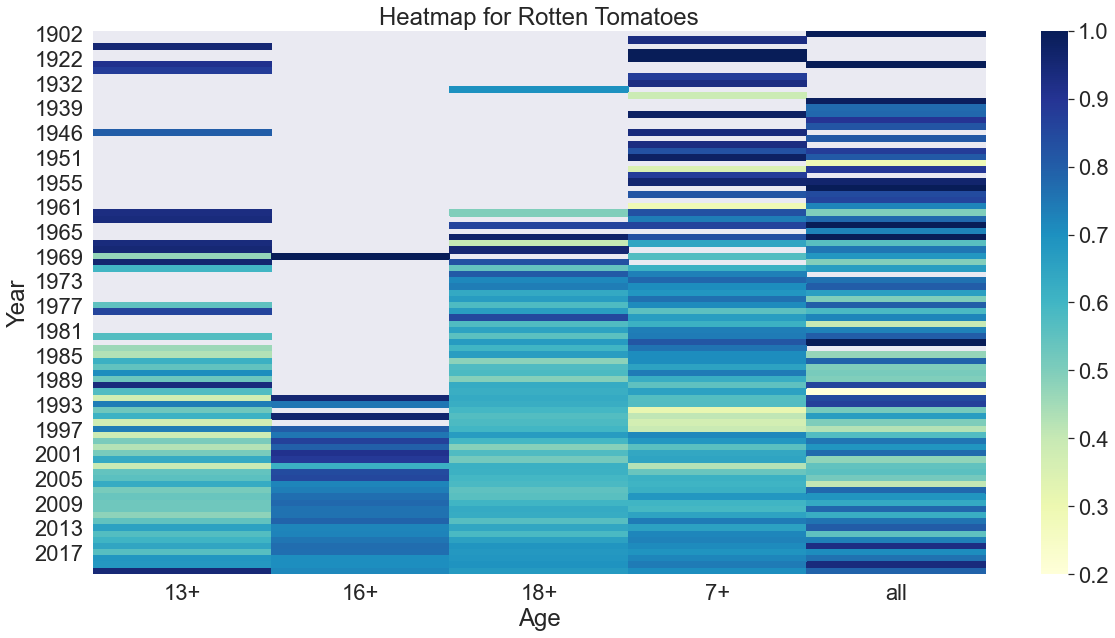

In [33]:
#Heatmap of age, year and rotten tomatoes
plt.figure(figsize=(20,10))
sns.set(font_scale=2) 
IMDb_data = pd.pivot_table(prep_data, values='Rotten Tomatoes', 
                     index=['Year'], 
                     columns='Age')
sns.heatmap(IMDb_data, cmap="YlGnBu").set_title('Heatmap for Rotten Tomatoes');

For all videos across all platforms, for all vidoes released in 16+ age category the rotten tomatoes rating is usually higher as in case of IMDb.